Here we imported the necessary libraries

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Here we handled the missing values

In [ ]:
df.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
total_null_values = df.isnull().sum().sum()
print(f"Total null values in the dataset: {total_null_values}")

Total null values in the dataset: 0


Here we checked for duplicates

In [ ]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


here we checked whether our data is consistent or no

In [ ]:
if df['id'].is_unique:
    print("All IDs are unique.")
else:
    print("Duplicate IDs found.")

All IDs are unique.


In [ ]:
print("Unique values in 'diagnosis':", df['diagnosis'].unique())


Unique values in 'diagnosis': ['M' 'B']


In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
invalid_values = {col: df[df[col] < 0][col].count() for col in numerical_cols}
print("Columns with negative values:", {k: v for k, v in invalid_values.items() if v > 0})

Columns with negative values: {}


Here we spcifically removed our outliers as they were a bad input to our process

In [ ]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).sum()
print("Number of outliers in each column:")
print(outliers)

Number of outliers in each column:
id                         81
radius_mean                14
texture_mean                7
perimeter_mean             13
area_mean                  25
smoothness_mean             6
compactness_mean           16
concavity_mean             18
concave points_mean        10
symmetry_mean              15
fractal_dimension_mean     15
radius_se                  38
texture_se                 20
perimeter_se               38
area_se                    65
smoothness_se              30
compactness_se             28
concavity_se               22
concave points_se          19
symmetry_se                27
fractal_dimension_se       28
radius_worst               17
texture_worst               5
perimeter_worst            15
area_worst                 35
smoothness_worst            7
compactness_worst          16
concavity_worst            12
concave points_worst        0
symmetry_worst             23
fractal_dimension_worst    24
dtype: int64


In [ ]:
filtered_data = df[
    ~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
]
print(f"Rows before removing outliers: {df.shape[0]}")
print(f"Rows after removing outliers: {filtered_data.shape[0]}")

Rows before removing outliers: 569
Rows after removing outliers: 346


Transforming Data

we check the skewness of the data so as to understand how data is distributed around the mean

In [ ]:
skewness = df[numerical_cols].skew()
print("Skewness of numerical features:")
print(skewness)

Skewness of numerical features:
id                         6.473752
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473

We are using Log Transformation as our data is highly skewed and hence we want to make it appear more normally distributed

In [ ]:
import numpy as np

log_transformed_data = df.copy()
log_features = ['area_mean', 'compactness_mean', 'concavity_mean', 'radius_se', 'area_se']
for feature in log_features:
    log_transformed_data[feature] = np.log1p(log_transformed_data[feature])


In [ ]:
transformed_skewness = log_transformed_data[numerical_cols].skew()
print("Skewness after transformation:")
print(transformed_skewness)

Skewness after transformation:
id                         6.473752
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  0.287328
smoothness_mean            0.456324
compactness_mean           1.043195
concavity_mean             1.206982
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  1.713417
texture_se                 1.646444
perimeter_se               3.443615
area_se                    0.847298
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.4735

Now we are applying Standard scalar to get mean of 0 and std deviation of 1

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = df.copy()
data_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

Encoding of Categorical Data, so as to convert categorical into numerical values

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data_scaled['diagnosis'] = label_encoder.fit_transform(data_scaled['diagnosis'])


Feature so as to give only relevant input to the model

In [ ]:
X = df.drop(columns=["id", "diagnosis"])
y = df["diagnosis"]

calculating the variance of each feature in the data. If the variance of any feature is higher than the threshold value, it will be kept or otherwise it will be removed i.e using the concept of variance threshold

In [ ]:

feature_variance = X.var()

print("Variance of each feature:")
print(feature_variance)


Variance of each feature:
radius_mean                    12.418920
texture_mean                   18.498909
perimeter_mean                590.440480
area_mean                  123843.554318
smoothness_mean                 0.000198
compactness_mean                0.002789
concavity_mean                  0.006355
concave points_mean             0.001506
symmetry_mean                   0.000752
fractal_dimension_mean          0.000050
radius_se                       0.076902
texture_se                      0.304316
perimeter_se                    4.087896
area_se                      2069.431583
smoothness_se                   0.000009
compactness_se                  0.000321
concavity_se                    0.000911
concave points_se               0.000038
symmetry_se                     0.000068
fractal_dimension_se            0.000007
radius_worst                   23.360224
texture_worst                  37.776483
perimeter_worst              1129.130847
area_worst                 3241

In [ ]:
from sklearn.feature_selection import VarianceThreshold


threshold = 5
variance_filter = VarianceThreshold(threshold=threshold)
X_variance_filtered = variance_filter.fit_transform(X)

selected_features_variance = X.columns[variance_filter.get_support()]
print("Features selected after Variance Threshold:")
print(selected_features_variance)


Features selected after Variance Threshold:
Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'area_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst'],
      dtype='object')


using the SeleckKbest technique to select the k best features

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

k_best_selector = SelectKBest(score_func=f_classif, k=5)
X_k_best = k_best_selector.fit_transform(X, y)
selected_features_k_best = X.columns[k_best_selector.get_support()]
print("Top 5 features selected using SelectKBest:")
print(selected_features_k_best)


Top 5 features selected using SelectKBest:
Index(['perimeter_mean', 'concave points_mean', 'radius_worst',
       'perimeter_worst', 'concave points_worst'],
      dtype='object')


SelectPercentile to select a certain percentage of feature based on the chossen statistical function such as chi2, anova etc, here f_classif i.e. annova F-values is used

In [ ]:
from sklearn.feature_selection import SelectPercentile

percentile_selector = SelectPercentile(score_func=f_classif, percentile=20)
X_percentile = percentile_selector.fit_transform(X, y)
selected_features_percentile = X.columns[percentile_selector.get_support()]
print("Features selected using SelectPercentile (Top 20%):")
print(selected_features_percentile)


Features selected using SelectPercentile (Top 20%):
Index(['perimeter_mean', 'concave points_mean', 'radius_worst',
       'perimeter_worst', 'area_worst', 'concave points_worst'],
      dtype='object')


here PCA i.e Principal Component Analysis is used so as to reduce higher dimension into lower dimensions with losing the important information by identfying the pattern and relations in the data and again we have reduced the features to 20 by PCA and we have shown the correlation analysis using the heatmap

Explained variance ratio for each component:
[9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04
 8.82724536e-05 6.64883951e-06 4.01713682e-06 8.22017197e-07
 3.44135279e-07 1.86018721e-07 6.99473206e-08 1.65908880e-08
 6.99641650e-09 4.78318306e-09 2.93549214e-09 1.41684927e-09
 8.29577732e-10 5.20405883e-10 4.08463983e-10 3.63313379e-10]

Cumulative variance explained by components:
[0.98204467 0.99822116 0.99977867 0.9998996  0.99998788 0.99999453
 0.99999854 0.99999936 0.99999971 0.99999989 0.99999996 0.99999998
 0.99999999 0.99999999 1.         1.         1.         1.
 1.         1.        ]

Shape of the dataset after PCA:
(569, 20)


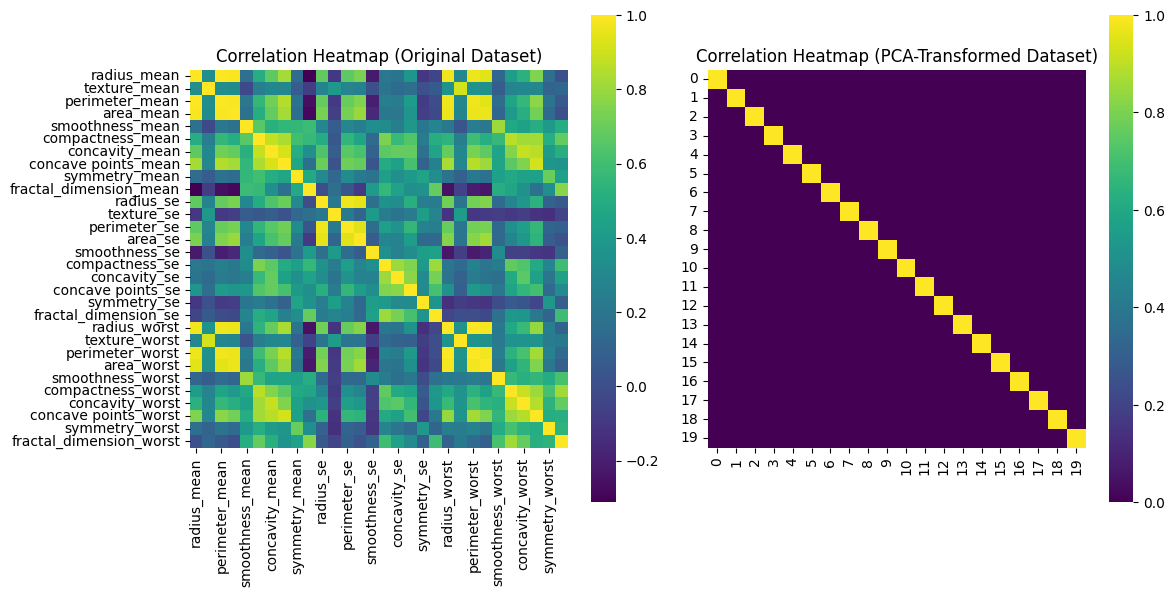

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt


pca = PCA(n_components=20)
X_pca = pca.fit_transform(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

print("Explained variance ratio for each component:")
print(explained_variance_ratio)

print("\nCumulative variance explained by components:")
print(cumulative_variance)

print("\nShape of the dataset after PCA:")
print(X_pca.shape)

original_corr = pd.DataFrame(X).corr()
pca_corr = pd.DataFrame(X_pca).corr()


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.heatmap(original_corr, annot=False, cmap='viridis', cbar=True, square=True)
plt.title("Correlation Heatmap (Original Dataset)")


plt.subplot(1, 2, 2)
sns.heatmap(pca_corr, annot=False, cmap='viridis', cbar=True, square=True)
plt.title("Correlation Heatmap (PCA-Transformed Dataset)")

plt.tight_layout()
plt.show()
